# 1. Tek Değişkenli Aykırı Gözlem Analizi

In [1]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include = ["float64", "int64"])

In [2]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table = df["table"].copy()

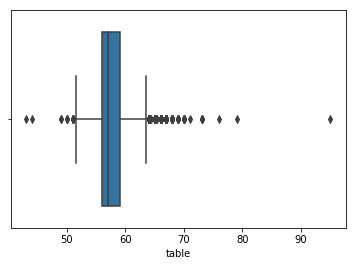

In [4]:
sns.boxplot(x = df_table);

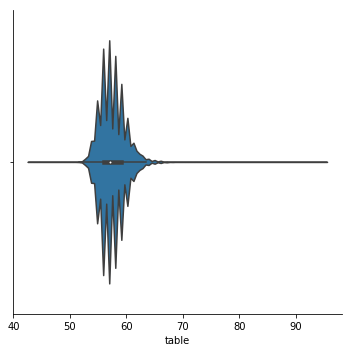

In [5]:
sns.catplot(x = "table", kind = "violin", data = df);

In [6]:
Q1  = df_table.quantile(0.25)  # ilk %25 liğe karşılık gelen değeri seçer.(ilk çeyrek)
Q3  = df_table.quantile(0.75)  # ilk %75 liğe karşılık gelen değeri seçer.(üçüncü çeyrek)
IQR = Q3 - Q1

# verinin 3.çeyrekteki değeri ile 1.çeyrekteki değerini birbirinden çıkardığımızda elde ettiğimiz aralığı 1.5 ile çarpıp,
# alt sınırdan ve üst sınırdan çıkardığımızda kabul edilebilir bir aralığı göz önünde bulundurup,
# bu aralığın iki yönlü olacak şekilde dışarıda kalan değerlere 'aykırı gözlem' muamelesi yapmak için

alt_sinir = Q1 - 1.5 * IQR  # alt sınır için eşik değer hesaplama
üst_sinir = Q3 + 1.5 * IQR  # üst sınır için eşik değer hesaplama

In [7]:
alt_sinir

51.5

In [8]:
üst_sinir

63.5

In [9]:
(df_table < (alt_sinir)) | (df_table > (üst_sinir))  # aykırı değer sorgulaması(True olanlar aykırı)

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [10]:
df_table < (alt_sinir)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [11]:
aykiri_tf = df_table < (alt_sinir)

In [12]:
aykiri_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [13]:
aykirilar = df_table[aykiri_tf]  # aykırı gözlemlerimiz
aykirilar

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [14]:
aykirilar.index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

----------

# 2. Aykırı Değer Probleminin Çözülmesi

In [15]:
import pandas as pd

In [16]:
type(df_table)

pandas.core.series.Series

In [17]:
df_table.shape

(53940,)

In [18]:
df_table = df_table.to_frame()  # dataframe'e çevirmemiz gerekli

In [19]:
df_table.shape

(53940, 1)

In [20]:
# Aykırı Değerleri Silmek

temiz_df_table = df_table[~((df_table < (alt_sinir)) | (df_table > (üst_sinir))).any(axis = 1)]

In [21]:
temiz_df_table.shape

(53335, 1)

In [22]:
# Aykırı Değerleri Ortalama ile Doldurmak

df_table = df["table"].copy()

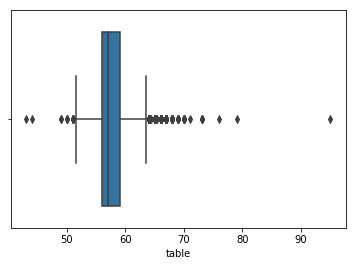

In [23]:
sns.boxplot(x = df_table);

In [24]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [25]:
df_table.mean()

57.45718390804603

In [26]:
df_table[aykiri_tf] = df_table.mean()

In [27]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [28]:
aykiri_tf = (df_table < (alt_sinir)) | (df_table > (üst_sinir)) 

In [29]:
aykiri_tf

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [30]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
239      64.0
296      66.0
314      70.0
356      66.0
359      68.0
461      64.0
504      64.0
526      67.0
712      67.0
771      65.0
777      70.0
868      64.0
919      69.0
929      65.0
932      64.0
1140     66.0
1196     64.0
1227     67.0
1275     67.0
1319     66.0
1422     64.0
1493     65.0
1498     66.0
1524     67.0
1552     66.0
         ... 
52136    64.0
52166    64.0
52167    65.0
52176    64.0
52230    66.0
52282    65.0
52393    70.0
52474    69.0
52583    67.0
52675    67.0
52731    64.0
52748    64.0
52825    64.0
52860    73.0
52861    73.0
52865    66.0
52869    64.0
52916    64.0
53064    68.0
53154    66.0
53226    65.0
53503    65.0
53542    67.0
53577    64.0
53660    67.0
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [31]:
df_table.mean()

57.45950528258309

In [32]:
df_table.describe()

count    53940.000000
mean        57.459505
std          2.230030
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [33]:
df_table[aykiri_tf] = df_table.mean()

In [34]:
df_table.describe()

count    53940.000000
mean        57.374369
std          2.062703
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [35]:
# Aykırı Değerleri Baskılama Yöntemi ile Doldurmak

df_table = df["table"].copy()

In [36]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
239      64.0
296      66.0
314      70.0
356      66.0
359      68.0
461      64.0
504      64.0
526      67.0
712      67.0
771      65.0
777      70.0
868      64.0
919      69.0
929      65.0
932      64.0
1140     66.0
1196     64.0
1227     67.0
1275     67.0
1319     66.0
1422     64.0
1493     65.0
1498     66.0
1524     67.0
1552     66.0
         ... 
52136    64.0
52166    64.0
52167    65.0
52176    64.0
52230    66.0
52282    65.0
52393    70.0
52474    69.0
52583    67.0
52675    67.0
52731    64.0
52748    64.0
52825    64.0
52860    73.0
52861    73.0
52865    66.0
52869    64.0
52916    64.0
53064    68.0
53154    66.0
53226    65.0
53503    65.0
53542    67.0
53577    64.0
53660    67.0
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [37]:
df_table[aykiri_tf] = alt_sinir

In [38]:
df_table[aykiri_tf]

2        51.5
91       51.5
145      51.5
219      51.5
227      51.5
239      51.5
296      51.5
314      51.5
356      51.5
359      51.5
461      51.5
504      51.5
526      51.5
712      51.5
771      51.5
777      51.5
868      51.5
919      51.5
929      51.5
932      51.5
1140     51.5
1196     51.5
1227     51.5
1275     51.5
1319     51.5
1422     51.5
1493     51.5
1498     51.5
1524     51.5
1552     51.5
         ... 
52136    51.5
52166    51.5
52167    51.5
52176    51.5
52230    51.5
52282    51.5
52393    51.5
52474    51.5
52583    51.5
52675    51.5
52731    51.5
52748    51.5
52825    51.5
52860    51.5
52861    51.5
52865    51.5
52869    51.5
52916    51.5
53064    51.5
53154    51.5
53226    51.5
53503    51.5
53542    51.5
53577    51.5
53660    51.5
53695    51.5
53697    51.5
53756    51.5
53757    51.5
53785    51.5
Name: table, Length: 589, dtype: float64

---------------

# 3. Çok Değişkenli Aykırı Gözlem Analizi

## 3.1. Local Outlier Factor

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

X_inliers = np.random.normal(70, 3, (100, 2))  # ort : 70, varyans : 3

X_inliers = np.r_[X_inliers + 10, X_inliers - 10]  # 'r_' ifadesi, index problemine takılmadan daha kolay array oluşturabilmek için.

print(X_inliers.shape)
print(X_inliers[:3, :2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [40]:
X_outliers = np.random.uniform(low = 15, high = 130, size = (20, 2)) # en hüçük değer : 15, en büyük değer : 130 olacak şekilde (20, 2) matrisli uniform sayılar

In [41]:
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [42]:
X = np.r_[X_inliers, X_outliers]

In [43]:
X[0:3, :]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [44]:
LOF = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [45]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [46]:
X_score = LOF.negative_outlier_factor_

In [47]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [48]:
X_score[0:3].mean()

-1.0395545985916275

In [49]:
X_score[0:3].std()

0.07700587483167197

In [50]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

<function matplotlib.pyplot.show(*args, **kw)>

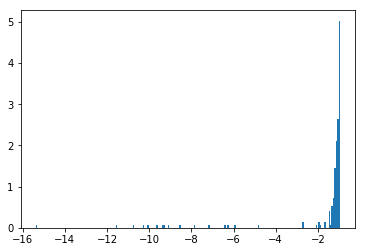

In [51]:
plt.hist(X_score, bins = "auto", density = True)
plt.show

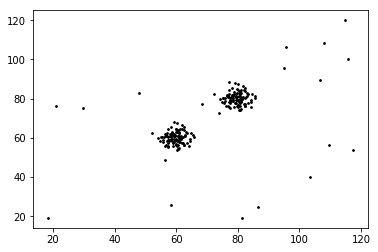

In [52]:
# Aykırı Gözlemlerin Görselleştirilmesi

plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");

In [53]:
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

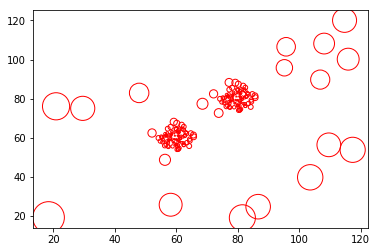

In [54]:
plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors = "r", facecolors = "none", label = "LOF Skorları");

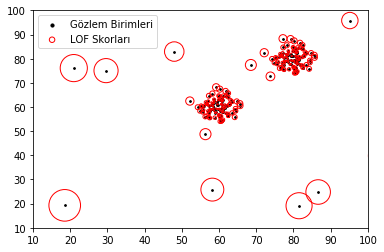

In [55]:
plt.scatter(X[:,0], X[:,1], color = "k", s = 3, label = "Gözlem Birimleri");
plt.scatter(X[:, 0], X[:, 1], s = 1000 * radius, edgecolors = "r", facecolors = "none", label = "LOF Skorları");

plt.xlim((10, 100))
plt.ylim((10, 100))

legend = plt.legend(loc = "upper left")

legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]

## 3.2. Çok Değişkenli Aykırı Gözlemlerin Yakalanması

In [56]:
X[0:3]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [57]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

In [58]:
esik_deger = np.sort(X_score)[9]
esik_deger

-8.512759037993277

In [59]:
(X_score > esik_deger)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [60]:
(X_score > esik_deger)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [61]:
tf_vektor = (X_score > esik_deger)

In [62]:
X[tf_vektor]

array([[ 81.49014246,  79.5852071 ],
       [ 81.94306561,  84.56908957],
       [ 79.29753988,  79.29758913],
       [ 84.73763845,  82.30230419],
       [ 78.59157684,  81.62768013],
       [ 78.60974692,  78.60281074],
       [ 80.72588681,  74.26015927],
       [ 74.8252465 ,  78.31313741],
       [ 76.96150664,  80.942742  ],
       [ 77.27592777,  75.7630889 ],
       [ 84.39694631,  79.3226711 ],
       [ 80.20258461,  75.72575544],
       [ 78.36685183,  80.33276777],
       [ 76.54701927,  81.12709406],
       [ 78.19808393,  79.12491875],
       [ 78.19488016,  85.55683455],
       [ 79.95950833,  76.82686721],
       [ 82.46763474,  76.33746905],
       [ 80.62659079,  74.12098963],
       [ 76.01544185,  80.59058371],
       [ 82.21539974,  80.51410484],
       [ 79.65305515,  79.09668891],
       [ 75.56443403,  77.84046737],
       [ 78.61808369,  83.17136668],
       [ 81.03085487,  74.71087953],
       [ 80.97225191,  78.84475316],
       [ 77.969234  ,  81.83502887],
 

In [63]:
X[X_score < esik_deger]  # aykırı gözlemler

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [64]:
X[~tf_vektor] # aykırı gözlemlere erişmenin diğer yolu

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [65]:
X[200:220]

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

## 3.3. Çok Değişkenli Aykırı Gözlemlerin Doldurulması

In [66]:
# Aykırı Gözlemleri Silmek

import numpy as np

df = X[X_score > esik_deger]

In [67]:
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [68]:
df[0:10]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [69]:
df_X = X.copy()

In [70]:
np.mean(df_X[0])

80.53767477776006

In [71]:
np.mean(df_X[1])

83.25607759176307

In [72]:
df_X[0]

array([81.49014246, 79.5852071 ])

In [73]:
df_X[0:2, 0:2]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957]])

In [74]:
df_X[1]

array([81.94306561, 84.56908957])

In [75]:
df_X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [76]:
aykirilar = df_X[~tf_vektor]

In [77]:
aykirilar[:, :1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [78]:
aykirilar[0]

array([114.71331664, 120.02266354])

In [79]:
aykirilar[:, :1] = np.mean(df_X[0])

In [80]:
aykirilar[:, :1]

array([[80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478]])

In [81]:
aykirilar[:, 1:2] = np.mean(df_X[1])

In [82]:
aykirilar

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [83]:
df_X[~tf_vektor] = aykirilar

In [84]:
df_X[~tf_vektor]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [85]:
# aykırı gözlemleri baskılama ile değiştirmek

df_X = X.copy()

In [86]:
df_X[~tf_vektor]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [87]:
df_X[X_score == esik_deger]

array([[58.19203955, 25.80792308]])

In [88]:
df_X[~tf_vektor] = df_X[X_score == esik_deger]

In [89]:
df_X[~tf_vektor]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

---------

# 4. Eksik Veri

## 4.1. Eksik Veri - Hızlı Çözüm

In [90]:
import numpy as np
import pandas as pd

V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])

df = pd.DataFrame({"V1" : V1, "V2" : V2, "V3" : V3})

In [91]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [92]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [93]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [94]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [95]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [96]:
dff = df.dropna()

In [97]:
dff.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

In [98]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [99]:
df["V1"].mean()

6.0

In [100]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [101]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [102]:
df.apply(lambda x : x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## 4.2. Eksik Gözlemleri Saptamak

In [103]:
import numpy as np
import pandas as pd

V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])

df = pd.DataFrame({"V1" : V1, "V2" : V2, "V3" : V3})

In [104]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [105]:
df.shape

(9, 3)

In [106]:
df.describe()

,V1,V2,V3
count,7.0,6.000000,7.00000
mean,6.0,6.166667,11.00000
std,5.0,3.656045,9.72968
min,1.0,2.000000,2.00000
25%,2.0,3.500000,5.50000
50%,6.0,6.000000,7.00000
75%,8.0,7.750000,13.00000
max,15.0,12.000000,31.00000


In [107]:
df.dtypes

V1    float64
V2    float64
V3    float64
dtype: object

In [108]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [109]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [110]:
df.isnull().sum().sum()

7

In [111]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [112]:
df[df.isnull().any(axis = 1)]  # df de en az bir 'NaN' değeri olan gözlem satırlarını getirir.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [113]:
df[df.notnull().any(axis = 1)] # df'de en az bir 'NaN olmayan' değere sahip gözlem satırlarını getirir.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [114]:
df[df.notnull().all(axis = 1)]  # df'de hiç 'NaN' olmayan değere sahip gözlem satırlarını getirir.

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [115]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]  # bir üstteki hücrenin farklı bir yazılışı

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## 4.3. Eksik Veri Görselleştirme ve Rassallık İncelemesi

In [116]:
!pip install missingno

In [117]:
import missingno as msno

In [118]:
df.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


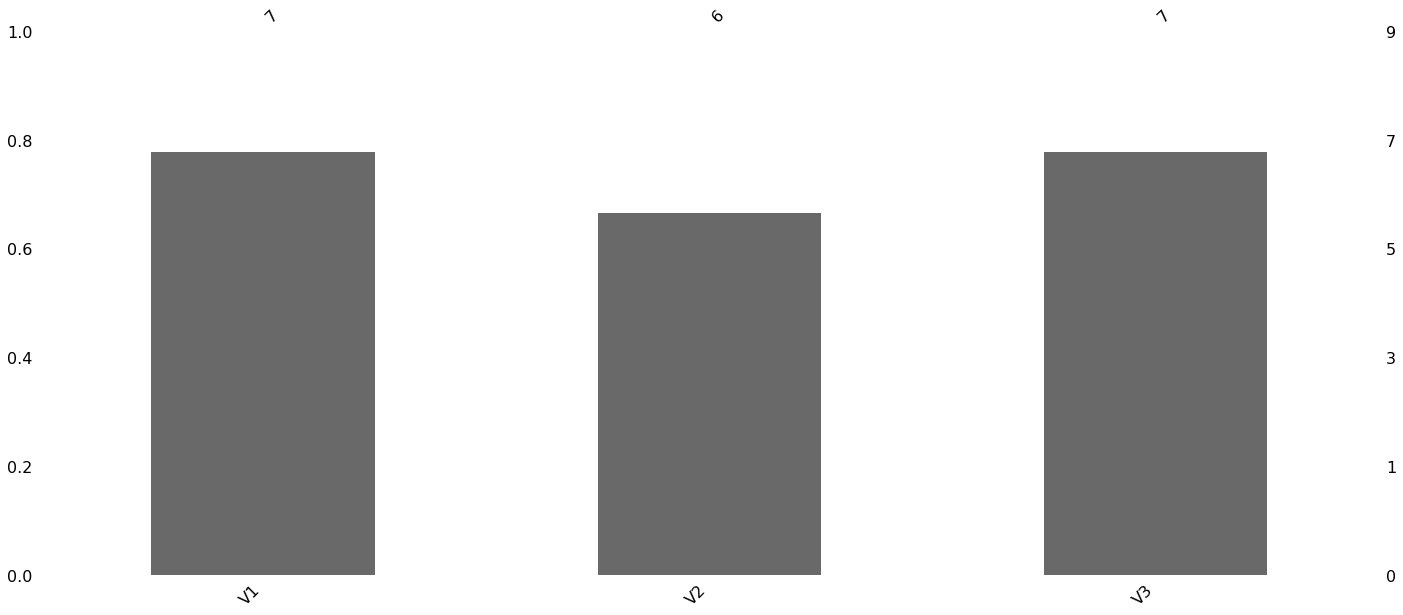

In [119]:
msno.bar(df);  # V1 değişkeninde yaklaşık olarak 0.2, V2'de 0.3, V3'de 0.2 oranında eksiklik olduğunu görebiliyoruz.

In [120]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [121]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [122]:
import seaborn as sns

In [123]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


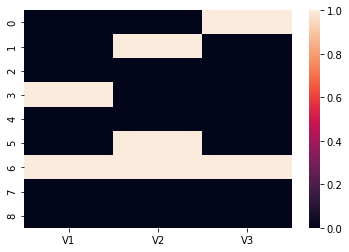

In [124]:
sns.heatmap(df.isnull()); # 6.gözlemin bütün değerleri eksik

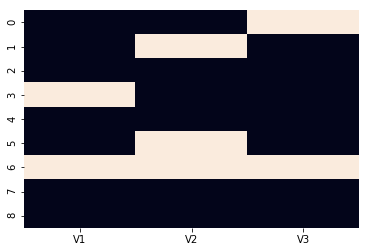

In [125]:
sns.heatmap(df.isnull(), cbar = False); # 7. ve 8. değerlerin bütün gözlemleri tam

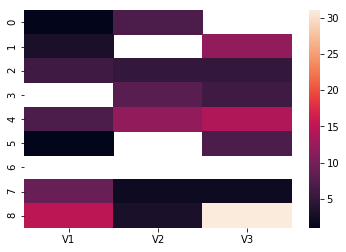

In [126]:
sns.heatmap(df);

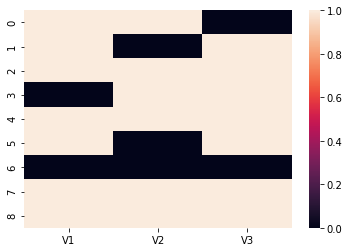

In [127]:
sns.heatmap(df.notnull());  # eksik değerleri gösteren 'heatmap'

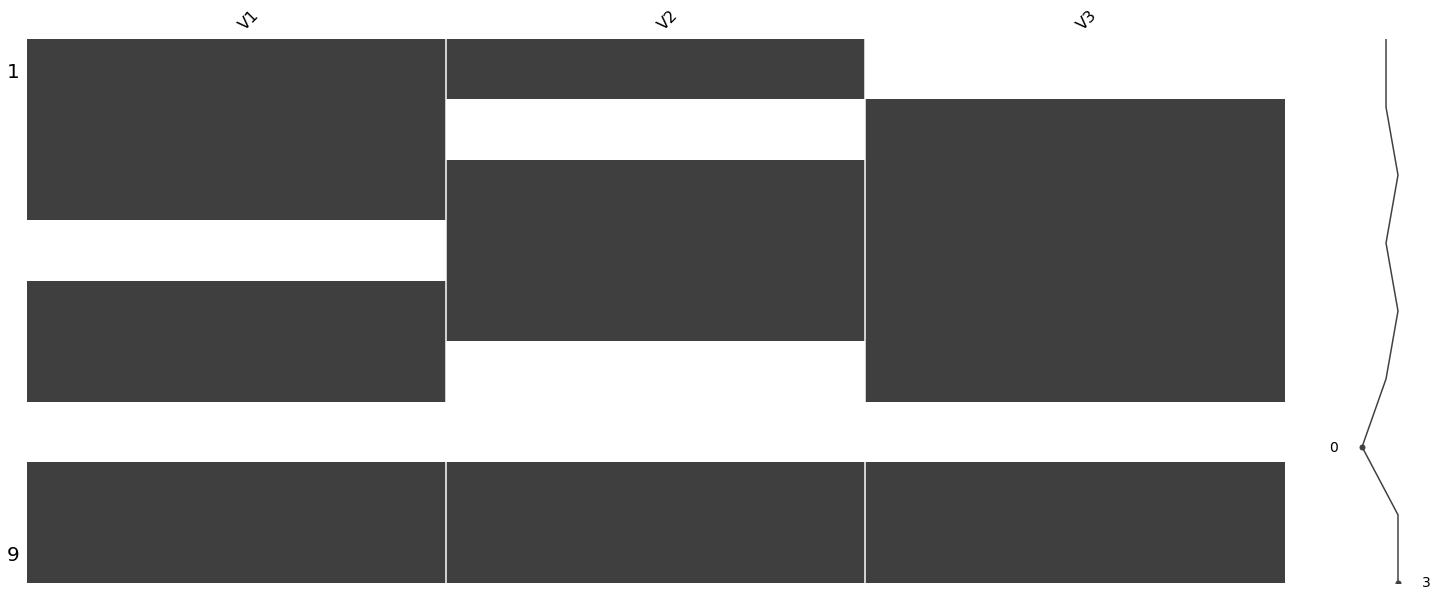

In [128]:
msno.matrix(df);

In [129]:
dfPlanets = sns.load_dataset("planets").copy()

In [130]:
dfPlanets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [131]:
sns.heatmap(dfPlanets);

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [132]:
dfPlanets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [133]:
dfPlanets.notnull().sum()

method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64

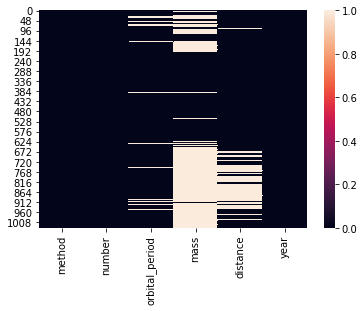

In [134]:
sns.heatmap(dfPlanets.isnull());

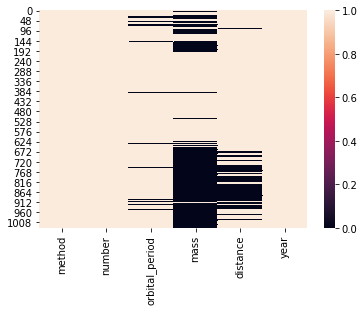

In [135]:
sns.heatmap(dfPlanets.notnull());

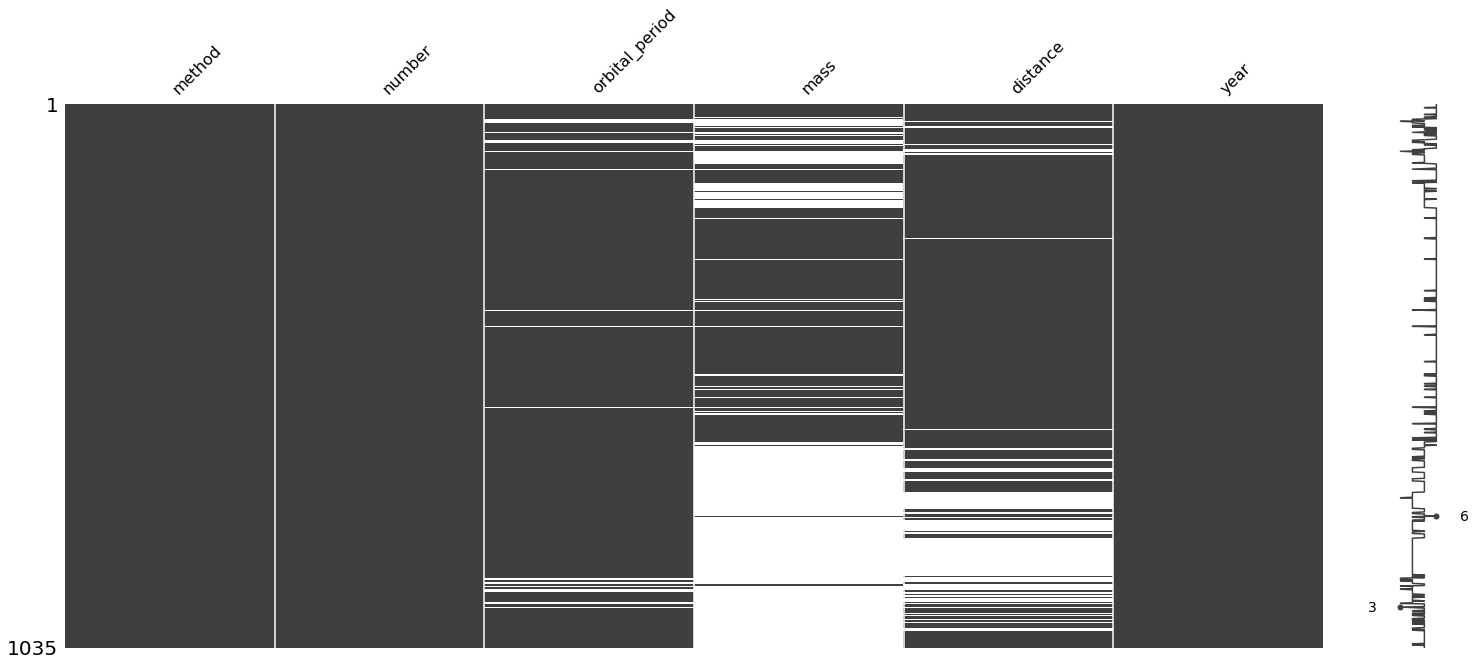

In [136]:
msno.matrix(dfPlanets);

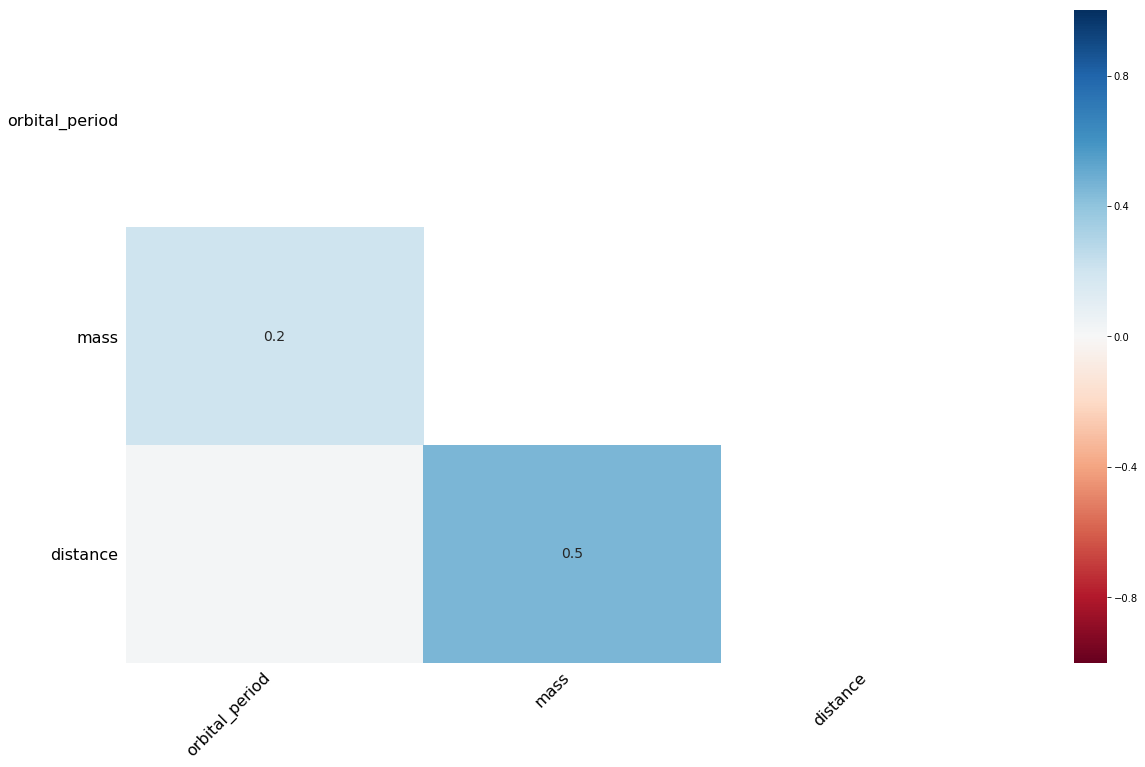

In [137]:
msno.heatmap(dfPlanets);  # nulllity correlation grafiği, örnek : mass'de eksiklik görüldüğünde %50 oranında distance'da da eksiklik vardır.

## 4.4. Eksik Veri Silme Yaklaşımları

In [138]:
import numpy as np
import pandas as pd

V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])

df = pd.DataFrame({"V1" : V1, "V2" : V2, "V3" : V3})

In [139]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [140]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [141]:
dfDropna = df.dropna()

In [142]:
df.dropna(how = "all") # bütün kolonları 'NaN' olanları siliyor.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [143]:
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


In [144]:
df["V1"][[3, 6]] = 99

In [145]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [146]:
df.dropna(axis = 1)  # 'axis = 1' sayesinde hiç 'NaN' değeri olmayan kolonları görmemizi sağlar.

,V1
0,1.0
1,3.0
2,6.0
3,99.0
4,7.0
5,1.0
6,99.0
7,9.0
8,15.0


In [147]:
df.dropna(axis = 1, how = "all") # aynı anda hiç bir değişkende(kolonda) bütün gözlemleri 'NaN' olmadığından dolayı silme işlemi gerçekleşmedi.

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [148]:
df["sil_beni"] = np.nan

In [149]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,99.0,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,99.0,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [150]:
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,99.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,99.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## 4.5. Basit Değer Atama Yöntemleri

In [151]:
import numpy as np
import pandas as pd

V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])

df = pd.DataFrame({"V1" : V1, "V2" : V2, "V3" : V3})

In [152]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [153]:
df["V1"].fillna(0)  # V1 kolonunun 'NaN' değerlerini 0 ile doldurmak için.

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [154]:
df["V1"].fillna(df["V1"].mean())  # V1 kolonunun 'NaN' değerlerini V1 ortalaması ile doldurmak için.

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [155]:
df.apply(lambda x : x.fillna(x.mean()), axis = 0)  # bütün kolonların 'NaN' değerlerini kolonlarının ortalamasıyla doldurmak için.

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [156]:
df.fillna(df.mean()[:])  # benzer bir yöntem

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [157]:
df.fillna(df.mean()["V1":"V2"])  # V1 ve V2 kolonlarının her birinin ortalamasını 'NaN' olarak atamak için.
df.fillna(df.median()["V3"])  # V3 kolonlarının medyanını 'NaN' değerlerine atamak için.

,V1,V2,V3
0,1.0,7.0,7.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,7.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,7.0,7.0
6,7.0,7.0,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [158]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [159]:
import numpy as np
import pandas as pd

V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
V4 = np.array(["IT", "IT", "IK", "IK", "IK", "IK", "IK", "IT", "IT"])

df = pd.DataFrame({"maas" : V1, "V2" : V2, "V3" : V3, "departman" : V4})

In [160]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [161]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [162]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

## 4.6. Kategorik Değişkenlerde Değer Atama

In [163]:
import numpy as np
import pandas as pd

V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
V4 = np.array(["IT", np.NaN, "IK", "IK", "IK", "IK", "IK", "IT", "IT"])

df = pd.DataFrame({"maas" : V1, "V2" : V2, "V3" : V3, "departman" : V4})

In [164]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,nan
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [165]:
df.isnull()  # departmanda eksik değer gözükmüyor.

,maas,V2,V3,departman
0,False,False,True,False
1,False,True,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,True,True,True,False
7,False,False,False,False
8,False,False,False,False


In [166]:
df.groupby("departman")["departman"].count()  # burada yakaladık.

departman
IK     5
IT     3
nan    1
Name: departman, dtype: int64

In [167]:
df.departman.loc[df.departman == "nan"] = "IK"

C:\Users\Sefa3\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [168]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [169]:
df.departman[0] = df.V3[0]

C:\Users\Sefa3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,IK
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [171]:
df.groupby("departman")["departman"].count()

departman
IK    6
IT    2
Name: departman, dtype: int64

In [172]:
df.departman.fillna(df["departman"].mode())

0    IK
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

## 4.7. Zaman Serilerinde Atama İşlemleri

In [173]:
import numpy as np
import pandas as pd

V1 = np.array([1, 3, 6, np.NaN, 7, 1, np.NaN, 9, 15])
V2 = np.array([7, np.NaN, 5, 8, 12, np.NaN, np.NaN, 2, 3])
V3 = np.array([np.NaN, 12, 5, 6, 14, 7, np.NaN, 2, 31])
V4 = np.array(["IT", "IT", "IK", "IK", "IK", "IK", "IK", "IT", "IT"])

df = pd.DataFrame({"maas" : V1, "V2" : V2, "V3" : V3, "departman" : V4})

In [174]:
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [175]:
df.maas.interpolate()

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [176]:
df["maas"].interpolate()  # 'maas' da bulunan 'NaN' değerlerinin yerine, 'NaN' değerinin bir önceki değeri ve bir sonraki değerinin ortalamasını alarak yazma

0     1.0
1     3.0
2     6.0
3     6.5
4     7.0
5     1.0
6     5.0
7     9.0
8    15.0
Name: maas, dtype: float64

In [177]:
df["maas"].fillna(method = "bfill")  # 'NaN' değerini bir sonraki değer ile doldurur.

0     1.0
1     3.0
2     6.0
3     7.0
4     7.0
5     1.0
6     9.0
7     9.0
8    15.0
Name: maas, dtype: float64

## 4.8. Tahmine Dayalı Değer Atama - KNN & Random Forests & EM

number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


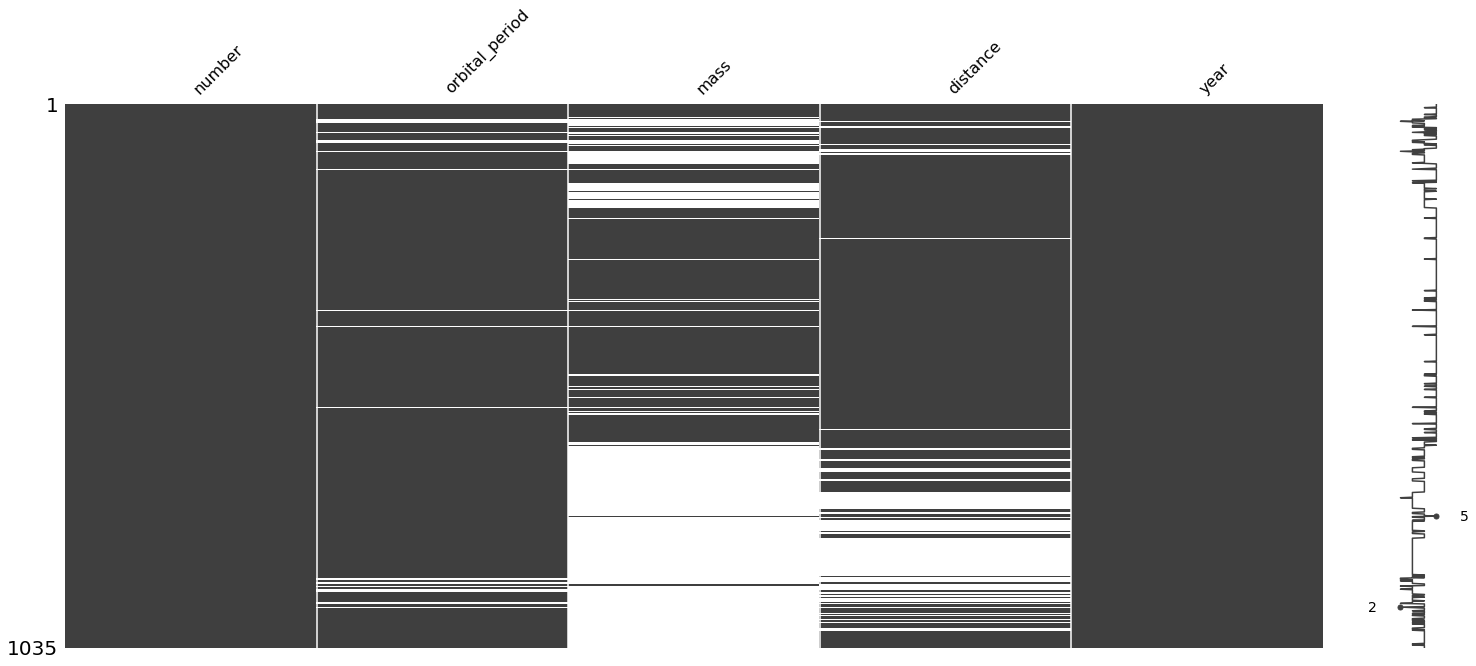

In [178]:
import seaborn as sns
df = sns.load_dataset('planets').copy()
df = df.select_dtypes(include = ["float64", "int64"])
print(df.isnull().sum())
msno.matrix(df);

In [179]:
!pip install fancyimpute

In [180]:
!pip install sklearn

In [181]:
import pandas as pd
from fancyimpute import KNN

Using TensorFlow backend.


In [189]:
list(df)

['number', 'orbital_period', 'mass', 'distance', 'year']

In [182]:
var_names = list(df)

In [183]:
# KNN yöntemi

In [185]:
knn_imp = KNN(k = 5).fit_transform(df);

Imputing row 1/1035 with 0 missing, elapsed time: 0.173
Imputing row 101/1035 with 1 missing, elapsed time: 0.176
Imputing row 201/1035 with 0 missing, elapsed time: 0.178
Imputing row 301/1035 with 0 missing, elapsed time: 0.178
Imputing row 401/1035 with 0 missing, elapsed time: 0.179
Imputing row 501/1035 with 0 missing, elapsed time: 0.180
Imputing row 601/1035 with 0 missing, elapsed time: 0.181
Imputing row 701/1035 with 2 missing, elapsed time: 0.183
Imputing row 801/1035 with 2 missing, elapsed time: 0.186
Imputing row 901/1035 with 2 missing, elapsed time: 0.190
Imputing row 1001/1035 with 1 missing, elapsed time: 0.194


In [186]:
knn_imp[0:10]

array([[1.00000000e+00, 2.69300000e+02, 7.10000000e+00, 7.74000000e+01,
        2.00600000e+03],
       [1.00000000e+00, 8.74774000e+02, 2.21000000e+00, 5.69500000e+01,
        2.00800000e+03],
       [1.00000000e+00, 7.63000000e+02, 2.60000000e+00, 1.98400000e+01,
        2.01100000e+03],
       [1.00000000e+00, 3.26030000e+02, 1.94000000e+01, 1.10620000e+02,
        2.00700000e+03],
       [1.00000000e+00, 5.16220000e+02, 1.05000000e+01, 1.19470000e+02,
        2.00900000e+03],
       [1.00000000e+00, 1.85840000e+02, 4.80000000e+00, 7.63900000e+01,
        2.00800000e+03],
       [1.00000000e+00, 1.77340000e+03, 4.64000000e+00, 1.81500000e+01,
        2.00200000e+03],
       [1.00000000e+00, 7.98500000e+02, 8.62177075e-01, 2.14100000e+01,
        1.99600000e+03],
       [1.00000000e+00, 9.93300000e+02, 1.03000000e+01, 7.31000000e+01,
        2.00800000e+03],
       [2.00000000e+00, 4.52800000e+02, 1.99000000e+00, 7.47900000e+01,
        2.01000000e+03]])

In [187]:
dff = pd.DataFrame(knn_imp)

In [188]:
dff.head()

,0,1,2,3,4
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [190]:
dff.columns = var_names

In [191]:
dff.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [193]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [194]:
!pip install ycimpute

In [195]:
from ycimpute.imputer import knnimput

In [196]:
var_names = list(df)

In [197]:
n_df = np.array(df)

In [199]:
n_df.shape

(1035, 5)

In [200]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/1035 with 0 missing, elapsed time: 0.170
Imputing row 101/1035 with 1 missing, elapsed time: 0.172
Imputing row 201/1035 with 0 missing, elapsed time: 0.175
Imputing row 301/1035 with 0 missing, elapsed time: 0.176
Imputing row 401/1035 with 0 missing, elapsed time: 0.177
Imputing row 501/1035 with 0 missing, elapsed time: 0.178
Imputing row 601/1035 with 0 missing, elapsed time: 0.179
Imputing row 701/1035 with 2 missing, elapsed time: 0.181
Imputing row 801/1035 with 2 missing, elapsed time: 0.184
Imputing row 901/1035 with 2 missing, elapsed time: 0.187
Imputing row 1001/1035 with 1 missing, elapsed time: 0.191


In [201]:
dff = pd.DataFrame(dff, columns = var_names)

In [202]:
dff.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


In [203]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [204]:
# Random Forest ile Atama

In [205]:
from ycimpute.imputer import iterforest

In [206]:
var_names = list(df)

In [207]:
n_df = np.array(df)

In [208]:
dff = iterforest.IterImput().complete(n_df)

C:\Users\Sefa3\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [209]:
dff = pd.DataFrame(dff, columns = var_names)

In [210]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [211]:
# EM ile atama

In [212]:
from ycimpute.imputer import EM

In [213]:
var_names = list(df)

In [214]:
n_df = np.array(df)

In [215]:
dff = EM().complete(n_df)

In [216]:
dff = pd.DataFrame(dff, columns = var_names)

In [217]:
dff.isnull().sum()

number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [218]:
dff.head()

,number,orbital_period,mass,distance,year
0,1.0,269.300,7.10,77.40,2006.0
1,1.0,874.774,2.21,56.95,2008.0
2,1.0,763.000,2.60,19.84,2011.0
3,1.0,326.030,19.40,110.62,2007.0
4,1.0,516.220,10.50,119.47,2009.0


-----------

# 5. Veri Standardizasyonu - Dönüşümü

## 5.1. Standartlaştırma

In [2]:
import numpy as np
import pandas as pd

V1 = np.array([1, 3, 6, 6, 7])
V2 = np.array([7, 7, 5, 8, 12])
V3 = np.array([6, 12, 5, 6, 14])

df = pd.DataFrame({"V1" : V1, "V2" : V2, "V3" : V3})

df = df.astype(float)

In [3]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0


In [4]:
from sklearn import preprocessing

In [5]:
preprocessing.scale(df)

array([[-1.60356745, -0.34554737, -0.70920814],
       [-0.71269665, -0.34554737,  0.92742603],
       [ 0.62360956, -1.2094158 , -0.98198051],
       [ 0.62360956,  0.08638684, -0.70920814],
       [ 1.06904497,  1.81412369,  1.47297076]])

In [6]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0


## 5.2. Normalizasyon

In [7]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.51449576, 0.68599434, 0.51449576],
       [0.35491409, 0.60842415, 0.70982818]])

## 5.3. Min - Max Dönüşümü

In [8]:
scaler = preprocessing.MinMaxScaler(feature_range = (10, 20))

In [9]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [18.33333333, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## 5.4. Binarize Dönüşüm

In [10]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)

In [11]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 5.5. 0 - 1 Dönüşümü

In [12]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
print(df.head())

df_l = df.copy()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [13]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df_l["yeni_sex"] = df_l["sex"].cat.codes

In [15]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [16]:
lbe = preprocessing.LabelEncoder()

In [17]:
df_l["daha_yeni_sex"] = lbe.fit_transform(df_l["sex"])

In [18]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


## 5.6. "1 ve Diğerleri(0)" Dönüşümü

In [19]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [21]:
df_l["yeni_gun"] = np.where(df_l["day"].str.contains("Sun"), 1, 0) # 'Sun' olan değişken 1, diğerleri 0 olucak şekilde yeni kolon oluşturma.

In [22]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


## 5.7. Çok Sınıflı Dönüşüm

In [23]:
lbe = preprocessing.LabelEncoder()

In [24]:
df_l["daha_yeni_gün"] = lbe.fit_transform(df_l["day"])

In [25]:
df_l

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,daha_yeni_sex,yeni_gun,daha_yeni_gün
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1,2
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1,1,2
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1,1,2
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1,1,2
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1,1,2
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1,1,2


## 5.8. One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [26]:
df_one_hot = df.copy()

In [27]:
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["sex"]).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [28]:
pd.get_dummies(df_one_hot, columns = ["sex"], prefix = ["day"]).head()

,total_bill,tip,smoker,day,time,size,day_Male,day_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


## 5.9. Sürekli Değişkeni Kategorik Değişkene Çevirme

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
est = preprocessing.KBinsDiscretizer(n_bins = [3, 2, 2], encode = "ordinal", strategy = "quantile").fit(df)

ValueError: could not convert string to float: 'Female'

In [32]:
dff = df.select_dtypes(include = ["float64", "int64"])

In [33]:
est = preprocessing.KBinsDiscretizer(n_bins = [3, 2, 2], encode = "ordinal", strategy = "quantile").fit(dff)

In [35]:
est.transform(dff)[0:10]  # ilk kolon 0,1,2 - ikinci ve üçünkü kolon 0,1 olacak şekilde.(3, 2, 2'nin mantığı buydu.)

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

## 5.10. Değişkeni İndexe, İndexi Değişkene Çevirmek

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
df["yeni_degisken"] = df.index

In [38]:
df["yeni_degisken"] = df["yeni_degisken"] + 10

In [39]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


In [40]:
df.index = df["yeni_degisken"]

In [41]:
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='yeni_degisken', length=244)

In [42]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
yeni_degisken,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,10
11,10.34,1.66,Male,No,Sun,Dinner,3,11
12,21.01,3.50,Male,No,Sun,Dinner,3,12
13,23.68,3.31,Male,No,Sun,Dinner,2,13
14,24.59,3.61,Female,No,Sun,Dinner,4,14


----------------